In [35]:
fp = "./2024c/processed_data/2023-wimbledon-1305"
from pandas import read_csv
import matplotlib.pyplot as plt

In [36]:
df = read_csv(fp)
df.columns

Index(['Unnamed: 0', 'match_id', 'elapsed_time', 'p1_sets', 'p2_sets',
       'p1_games', 'p2_games', 'p1_score', 'p2_score', 'server', 'serve_no',
       'point_victor', 'p1_points_won', 'p2_points_won', 'game_victor',
       'set_victor', 'p1_ace', 'p2_ace', 'p1_winner', 'p2_winner',
       'p1_double_fault', 'p2_double_fault', 'p1_unf_err', 'p2_unf_err',
       'p1_net_pt', 'p2_net_pt', 'p1_net_pt_won', 'p2_net_pt_won',
       'p1_break_pt', 'p2_break_pt', 'p1_break_pt_won', 'p2_break_pt_won',
       'p1_break_pt_missed', 'p2_break_pt_missed', 'p1_distance_run',
       'p2_distance_run', 'rally_count', 'speed_mph', 'serve_width',
       'serve_depth', 'return_depth', 'winner_shot_type'],
      dtype='object')

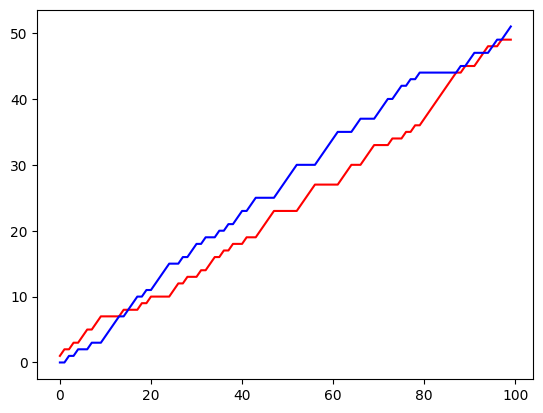

In [37]:
end = 100
plt.plot(df['p1_points_won'][:end], color='red')
plt.plot(df['p2_points_won'][:end], color='blue')


In [38]:
df['p1_points_won'][:end]


0      1
1      2
2      2
3      3
4      3
      ..
95    48
96    48
97    49
98    49
99    49
Name: p1_points_won, Length: 100, dtype: int64

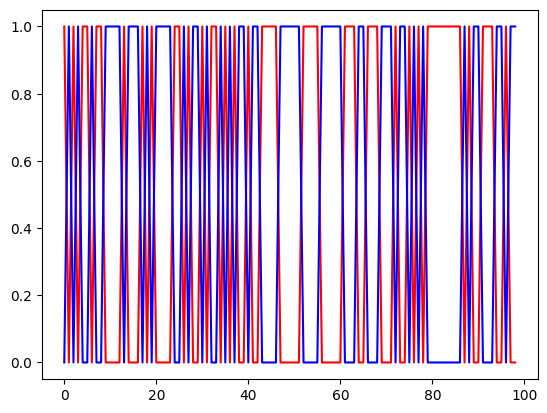

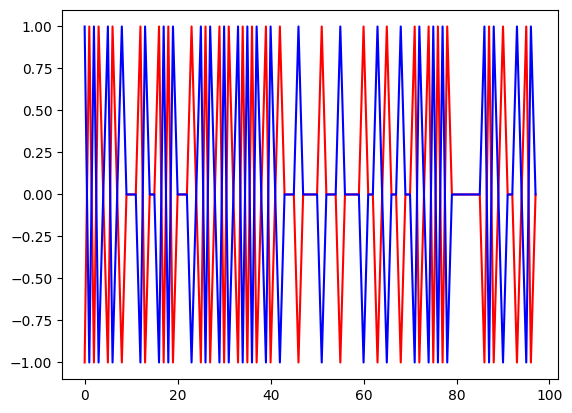

In [39]:
# 看看一阶差分
df1, df2 = df['p1_points_won'].tolist()[:end], df['p2_points_won'].tolist()[:end]
n = len(df1)
assert len(df1) == len(df2)

res1, res2 = [], []
for i in range(1,n):
    res1.append(df1[i]-df1[i-1])
    res2.append(df2[i]-df2[i-1])

plt.plot(res1, color='red')
plt.plot(res2, color='blue')
plt.show()

# 二阶差分
res3, res4 = [], []
for i in range(1,n-1):
    res3.append(res1[i]-res1[i-1])
    res4.append(res2[i]-res2[i-1])

plt.plot(res3, color='red')
plt.plot(res4, color='blue')
plt.show()

In [40]:
# 混合差分
# df1, df2 = df['p1_points_won'].tolist()[:end], df['p2_points_won'].tolist()[:end]
# n = len(df1)
# assert len(df1) == len(df2)

# res1, res2 = [], []
# for i in range(1,n):
#     res1.append(df1[i]-df2[i-1])
#     res2.append(df2[i]-df2[i-1])

# for i in range(2,n):
#     df1[i] -= df2[i-1]
#     df2[i] -= df1[i-1]

# plt.plot(df1, color='red')
# plt.plot(df2, color='blue')
# plt.show()

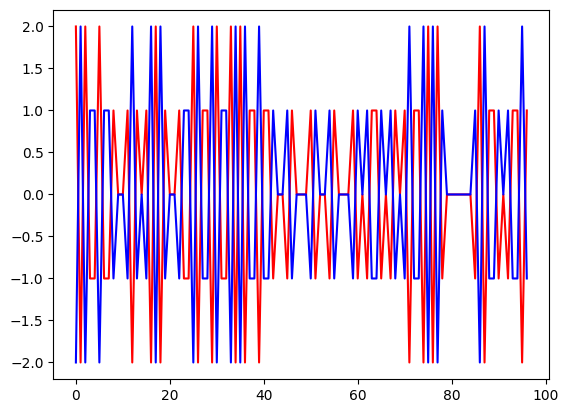

In [43]:
# 高阶差分
n_reduce = 3
df1, df2 = df['p1_points_won'].tolist()[:end], df['p2_points_won'].tolist()[:end]
assert len(df1) == len(df2)

def n_times_dif(df:list):
    n = len(df)
    for j in range(n_reduce):
        res = []
        for i in range(1,n-j):
            res.append(df[i]-df[i-1])
        df = res
    return res

# plt.plot(list(map(abs, df1)), color='red')
# plt.plot(list(map(abs, df2)), color='blue')
plt.plot(n_times_dif(df1), color='red')
plt.plot(n_times_dif(df2), color='blue')
plt.show()

In [42]:

# 看看得分差值的高阶差分
# n_reduce = 2
# df1, df2 = df['p1_points_won'].to_numpy()[:end], df['p2_points_won'].to_numpy()[:end]
# n = len(df1)
# assert len(df1) == len(df2)
# df1 = df1-df2
# df2 = df2-df1

# for j in range(1, n_reduce):
#     for i in range(j,n):
#         df1[i] -= df1[i-1]
#         df2[i] -= df1[i-1]

# plt.plot(df1, color='red')
# plt.plot(df2, color='blue')